In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the Excel file
data = pd.read_excel("C://Users//bhavy//Downloads//SmartWay Vehicle List for MY 2023.xlsx")

# Display the first few rows of the DataFrame
print(data.head())

                      Model  Displ  Cyl   Trans Drive         Fuel  \
0            AUDI Q4 e-tron    NaN  NaN  Auto-1   2WD  Electricity   
1            AUDI Q4 e-tron    NaN  NaN  Auto-1   2WD  Electricity   
2  AUDI Q4 e-tron Sportback    NaN  NaN  Auto-1   4WD  Electricity   
3  AUDI Q4 e-tron Sportback    NaN  NaN  Auto-1   4WD  Electricity   
4    AUDI Q4 e-tron quattro    NaN  NaN  Auto-1   4WD  Electricity   

  Cert Region  Stnd      Stnd Description  Underhood ID     Veh Class  \
0          FA  T3B0  Federal Tier 3 Bin 0  PVGAV00.0NZ4  standard SUV   
1          CA   ZEV        California ZEV  PVGAV00.0NZ4  standard SUV   
2          FA  T3B0  Federal Tier 3 Bin 0  PVGAT00.0NZ5  standard SUV   
3          CA   ZEV        California ZEV  PVGAT00.0NZ5  standard SUV   
4          FA  T3B0  Federal Tier 3 Bin 0  PVGAT00.0NZ5  standard SUV   

   Air Pollution Score City MPG Hwy MPG Cmb MPG  Greenhouse Gas Score SmartWay  
0                   10       30      36      33            

Average City MPG: 82.44444444444444


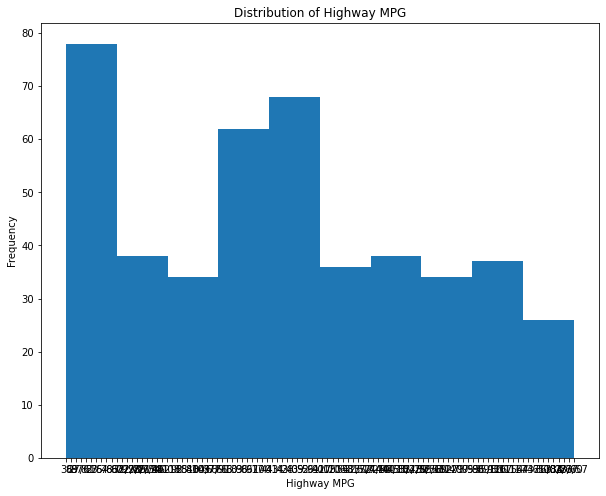

In [9]:
# Perform analysis on the data
# calculate the average City MPG
# Convert 'City MPG' column to numeric values
data['City MPG'] = pd.to_numeric(data['City MPG'], errors='coerce')

# Calculate the average City MPG
average_city_mpg = data['City MPG'].mean()
print("Average City MPG:", average_city_mpg)


# Generate a histogram of the Highway MPG
plt.figure(figsize=(10,8))
plt.hist(data['Hwy MPG'], bins=10)
plt.xlabel('Highway MPG')

plt.ylabel('Frequency')
plt.title('Distribution of Highway MPG')
plt.show()

In [10]:
# Analysis 2: Number of Vehicles by Vehicle Class
vehicle_class_counts = data['Veh Class'].value_counts()
print("\nNumber of Vehicles by Vehicle Class:")
print(vehicle_class_counts)



Number of Vehicles by Vehicle Class:
small SUV        123
midsize car       88
small car         68
standard SUV      66
large car         50
station wagon     34
pickup            16
minivan            6
Name: Veh Class, dtype: int64


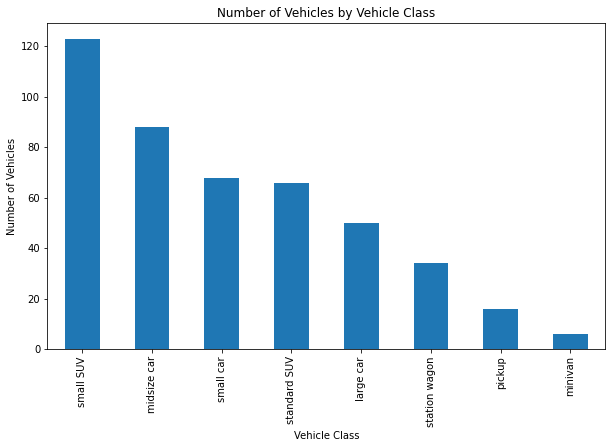

In [11]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(10, 6))
vehicle_class_counts.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Vehicle Class')
plt.show()


In [12]:
# Analysis 1: Distribution of Drive Types
drive_type_counts = data['Drive'].value_counts()
print("Distribution of Drive Types:")
print(drive_type_counts)


Distribution of Drive Types:
4WD    279
2WD    172
Name: Drive, dtype: int64


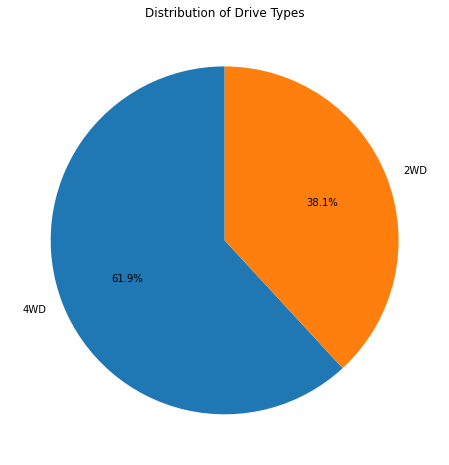

In [13]:
# Plotting the pie chart for drive types
plt.figure(figsize=(8, 8))
drive_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Drive Types')
plt.ylabel('')
plt.show()

In [14]:
# Analysis 2: Distribution of Fuel Types
fuel_type_counts = data['Fuel'].value_counts()
print("\nDistribution of Fuel Types:")
print(fuel_type_counts)


Distribution of Fuel Types:
Electricity             274
Gasoline                112
Gasoline/Electricity     55
Hydrogen                 10
Name: Fuel, dtype: int64


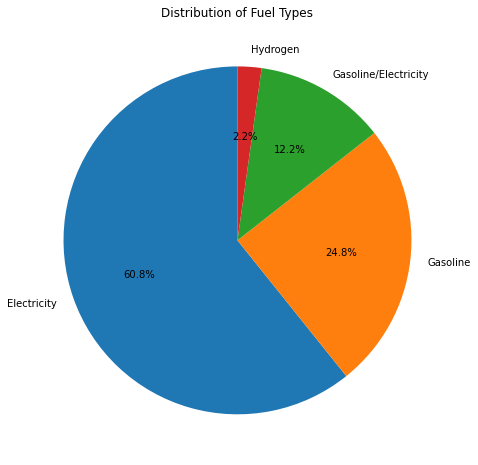

In [15]:
# Plotting the pie chart for fuel types
plt.figure(figsize=(8, 8))
fuel_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.ylabel('')
plt.show()

In [16]:
# Analysis 3: Number of Vehicles by Vehicle Class
vehicle_class_counts = data['Veh Class'].value_counts()
print("\nNumber of Vehicles by Vehicle Class:")
print(vehicle_class_counts)


Number of Vehicles by Vehicle Class:
small SUV        123
midsize car       88
small car         68
standard SUV      66
large car         50
station wagon     34
pickup            16
minivan            6
Name: Veh Class, dtype: int64


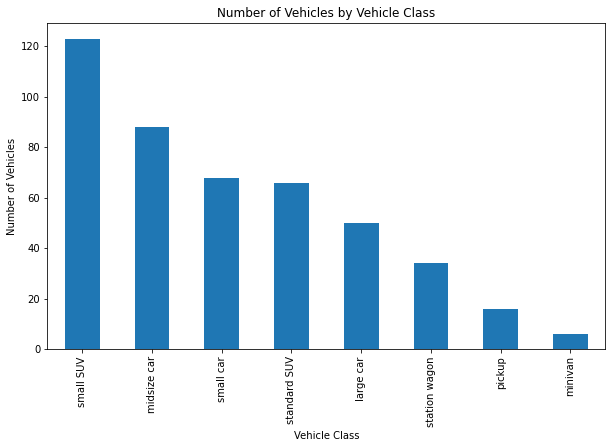

In [17]:
# Plotting the bar graph for vehicle classes
plt.figure(figsize=(10, 6))
vehicle_class_counts.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Vehicle Class')
plt.show()

In [18]:
# Analysis 4: Average City MPG by Vehicle Class
avg_city_mpg_by_class = data.groupby('Veh Class')['City MPG'].mean().sort_values(ascending=False)
print("\nAverage City MPG by Vehicle Class:")
print(avg_city_mpg_by_class)



Average City MPG by Vehicle Class:
Veh Class
station wagon    103.733333
large car        101.600000
small SUV         82.862745
midsize car       80.790698
standard SUV      75.840000
small car         69.724138
pickup            67.375000
minivan           35.500000
Name: City MPG, dtype: float64


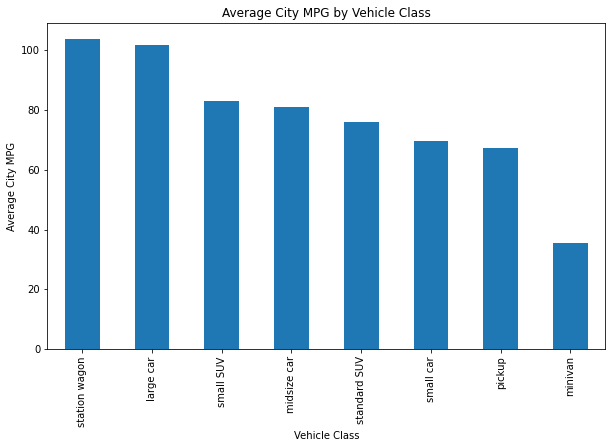

In [19]:
# Plotting the bar graph for average city MPG by vehicle class
plt.figure(figsize=(10, 6))
avg_city_mpg_by_class.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Average City MPG')
plt.title('Average City MPG by Vehicle Class')
plt.show()

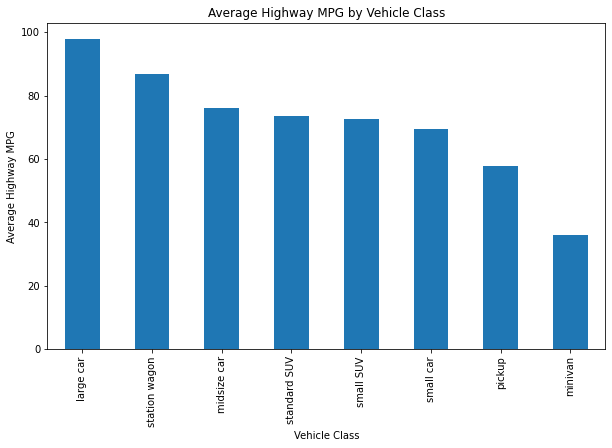

In [20]:
# Convert 'Hwy MPG' column to numeric
data['Hwy MPG'] = pd.to_numeric(data['Hwy MPG'], errors='coerce')

# Drop rows with missing or non-numeric values in 'Hwy MPG' column
data = data.dropna(subset=['Hwy MPG'])

# Calculate average highway MPG by vehicle class
avg_highway_mpg_by_class = data.groupby('Veh Class')['Hwy MPG'].mean().sort_values(ascending=False)

# Plotting the bar graph for average highway MPG by vehicle class
plt.figure(figsize=(10, 6))
avg_highway_mpg_by_class.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Highway MPG')
plt.title('Average Highway MPG by Vehicle Class')
plt.show()


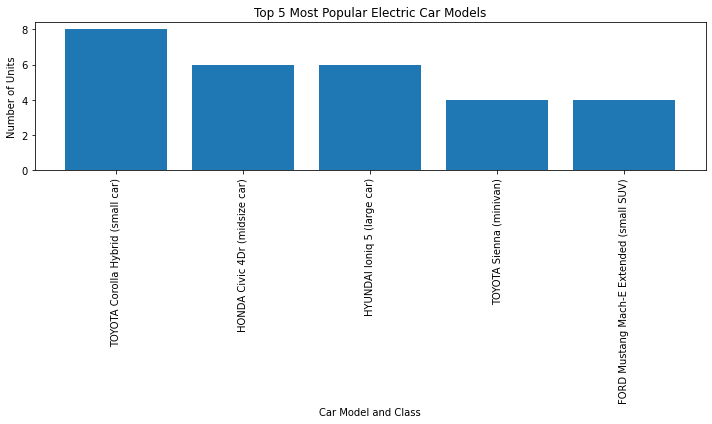

In [26]:
# Count the occurrences of each electric vehicle model
model_counts = data['Model'].value_counts()

# Get the top 5 most popular electric car models
top_5_models = model_counts.nlargest(5)

# Get the class of each top 5 model
model_classes = data.loc[data['Model'].isin(top_5_models.index), ['Model', 'Veh Class']].drop_duplicates()

# Merge the counts and classes
top_5_models_with_classes = pd.merge(top_5_models, model_classes, left_index=True, right_on='Model')

# Prepare the labels for the x-axis (Car Model and Class)
labels = top_5_models_with_classes['Model'] + ' (' + top_5_models_with_classes['Veh Class'] + ')'

# Prepare the counts for the y-axis
counts = top_5_models.values


# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.title('Top 5 Most Popular Electric Car Models')
plt.xlabel('Car Model and Class')
plt.ylabel('Number of Units')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
